
# Logistic Regression Project 

In this project I will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. I will attempt to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## Exploratory Data Analysis

**Histogram of the Age**

<Axes: xlabel='Age', ylabel='Count'>

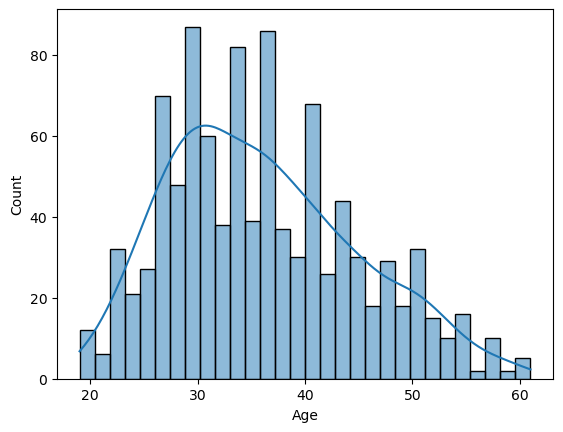

In [6]:
sns.histplot(data=df,x='Age',bins = 30,kde = True)

**Jointplot showing Area Income versus Age.**

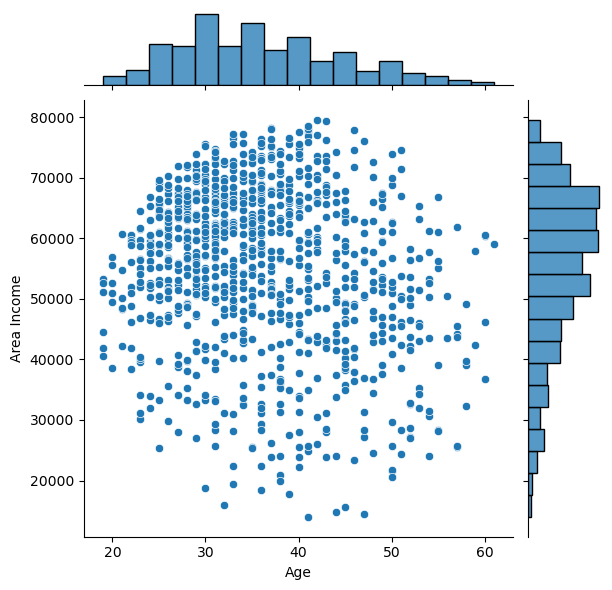

In [7]:
sns.jointplot(data=df, x='Age', y='Area Income')

**Jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

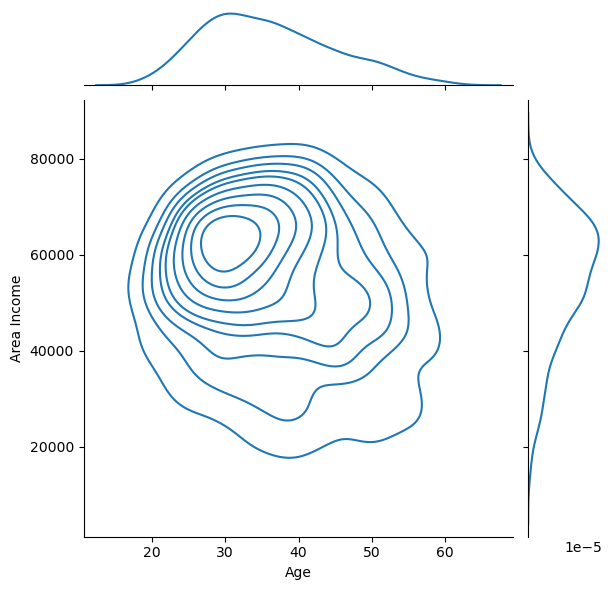

In [8]:
sns.jointplot(data=df, x='Age', y='Area Income', kind='kde')

**Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

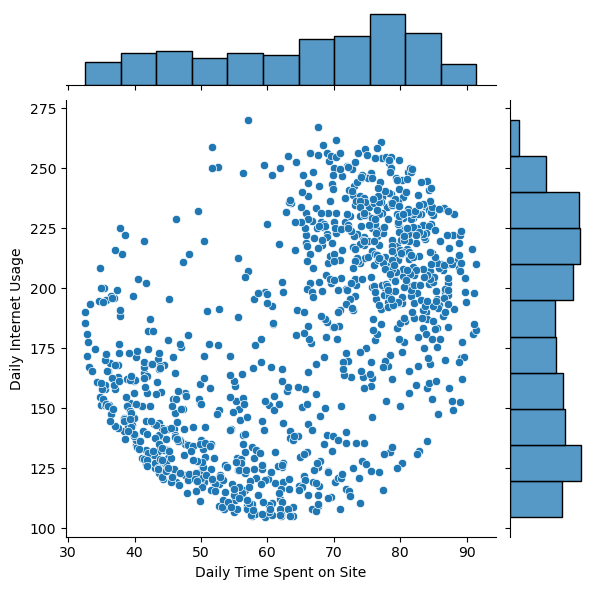

In [14]:
sns.jointplot(data=df, x='Daily Time Spent on Site', y='Daily Internet Usage')

**Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage' break down by clicked on Add**

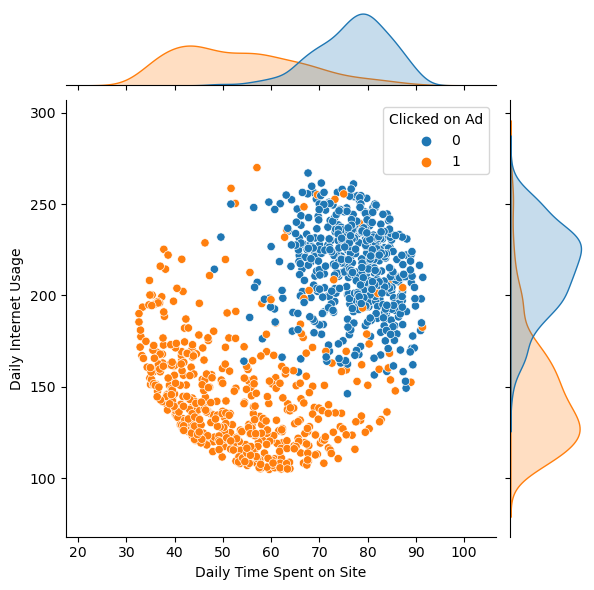

In [11]:
sns.jointplot(data=df, x='Daily Time Spent on Site', y='Daily Internet Usage',hue='Clicked on Ad')

**Pairplot with the hue defined by the 'Clicked on Ad' column feature.**

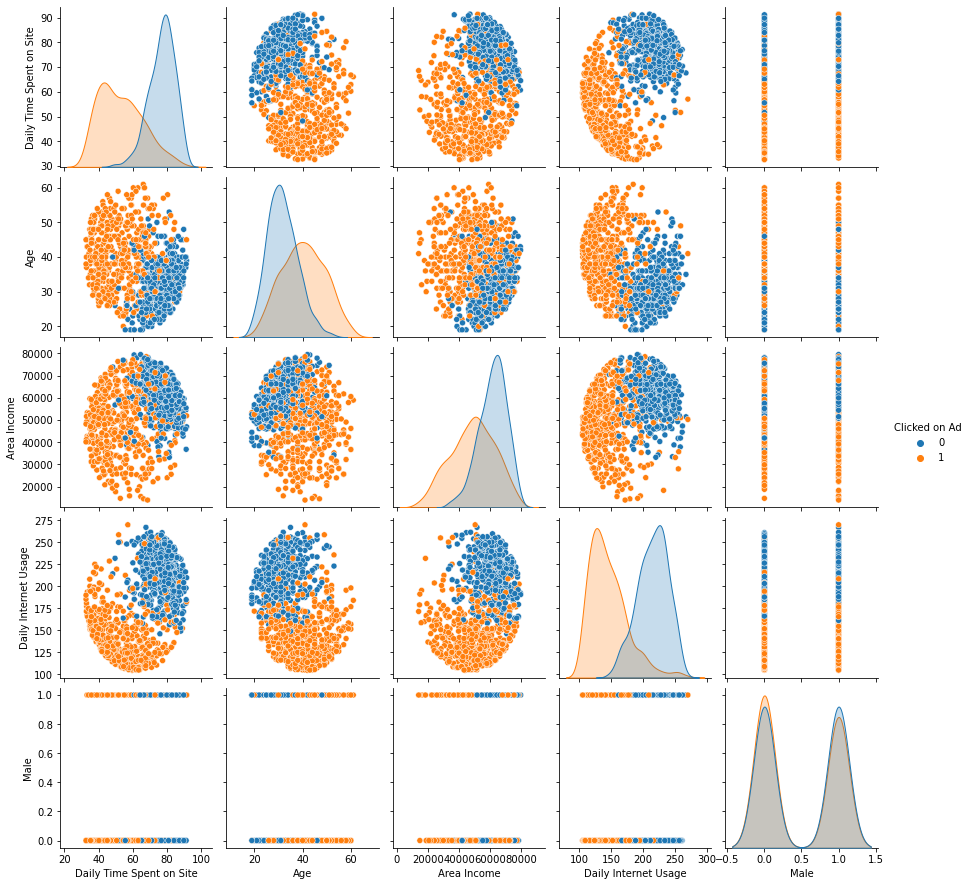

In [18]:
sns.pairplot(data=df,hue='Clicked on Ad')

/var/folders/cg/vf981v4x5tz8b5szmpt19_xm0000gp/T/ipykernel_16905/2157429118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

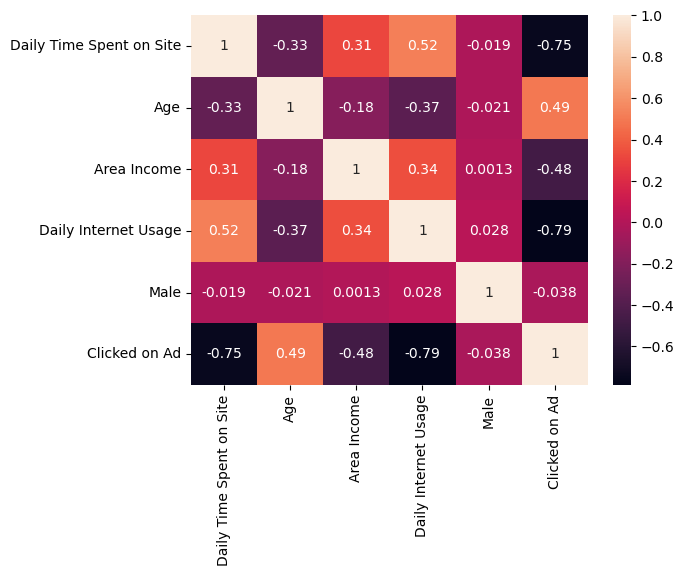

In [16]:
sns.heatmap(df.corr(),annot=True)


**Checking for Null Variables**

<Axes: >

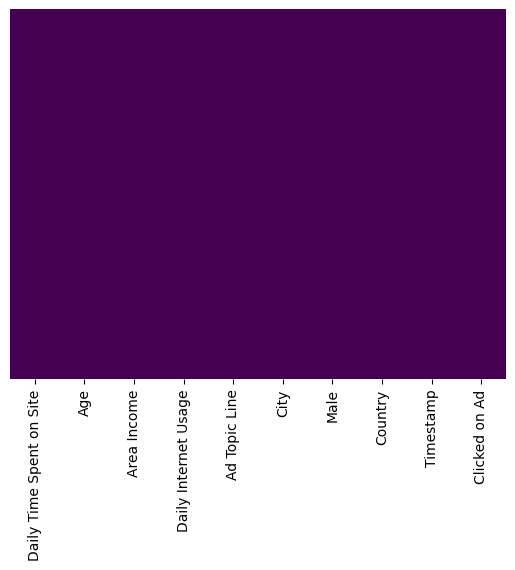

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Logistic Regression

Now it's time to do a train test split, and train our model!

In [23]:
df_n = df.drop(['Ad Topic Line','City','Timestamp','Country'], axis=1)
df_n

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(df_n.drop('Clicked on Ad',axis=1), 
                                                    df_n['Clicked on Ad'], test_size=0.30, 
                                                    random_state=101)

**Train and fit a logistic regression model on the training set**

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

## Predictions and Evaluations

In [28]:
predictions = log.predict(X_test)

**Classification report for the model**

In [29]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(Y_test, predictions)

array([[149,   8],
       [ 14, 129]])

In [34]:
print("Training set Accuracy score: {:.3f}".format(log.score(X_train,Y_train)))
print("Test set Accuracy score: {:.3f}".format(log.score(X_test,Y_test)))

Training set Accuracy score: 0.890
Test set Accuracy score: 0.927


In [33]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.281748
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Mon, 07 Aug 2023   Pseudo R-squ.:                  0.5934
Time:                        09:40:55   Log-Likelihood:                -197.22
converged:                       True   LL-Null:                       -485.06
Covariance Type:            nonrobust   LLR p-value:                2.842e-123
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0511      0.009     -5.569      0.000      -0.069